# Answering below Questions using EDA:
### 1.)Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
### 2.)As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
### 3.)Suggest teams or players a company should endorse for its products.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
deli = pd.read_csv("deliveries.csv")
mat = pd.read_csv("matches.csv")

# EDA

Matches dataset is a metadata for the Deliveries dataset.

In [3]:
deli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [4]:
deli.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
#removing columns which has huge no. of null values
mat = mat.drop(['umpire3'],axis=1)
deli = deli.drop(['player_dismissed','dismissal_kind','fielder'],axis=1)

In [7]:
mat.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [8]:
mat.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [9]:
#Mi and Csk are on a good stage overall
mat.winner.value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [10]:
#converting toss_decision values 'bat' and 'feild' into binary
toss_dummy = pd.get_dummies(mat['toss_decision'])

In [11]:
mat2 = pd.merge(
    left=mat,
    right=toss_dummy,
    left_index=True,
    right_index=True,
)
mat2.drop(['toss_decision'],axis=1,inplace=True)

In [12]:
print(mat2.bat.value_counts())
print(mat2.field.value_counts())

0    463
1    293
Name: bat, dtype: int64
1    463
0    293
Name: field, dtype: int64


In [13]:
#45% of the time who won the toss and chose to bat won the match as well
round((((mat2[mat2.toss_winner == mat2.winner].bat).sum()/293)*100),2)

45.73

In [14]:
#55% of the time who won the toss and chose to field won the match as well
round((((mat2[mat2.toss_winner == mat2.winner].field).sum()/463)*100),2)

55.94

# Opting to field increases the chances of winning!

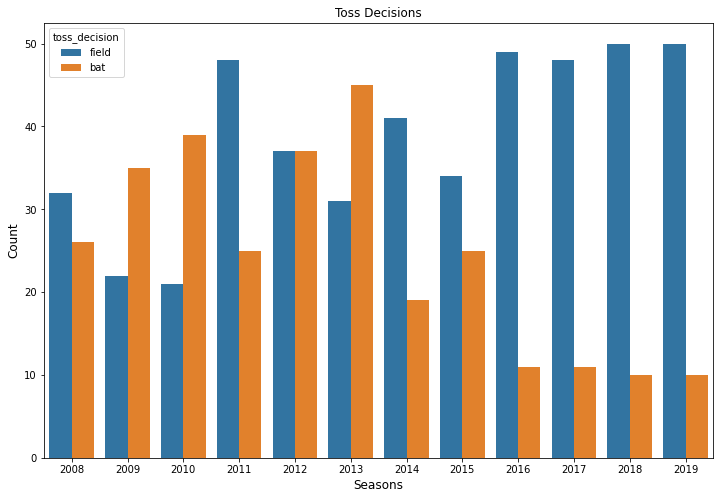

In [15]:
#From 2016 there were more no. of toss decisions chosen to be field
plt.figure(figsize=(12,8))
sns.countplot(x=mat.season,hue=mat.toss_decision)
plt.title('Toss Decisions')
plt.xlabel('Seasons',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

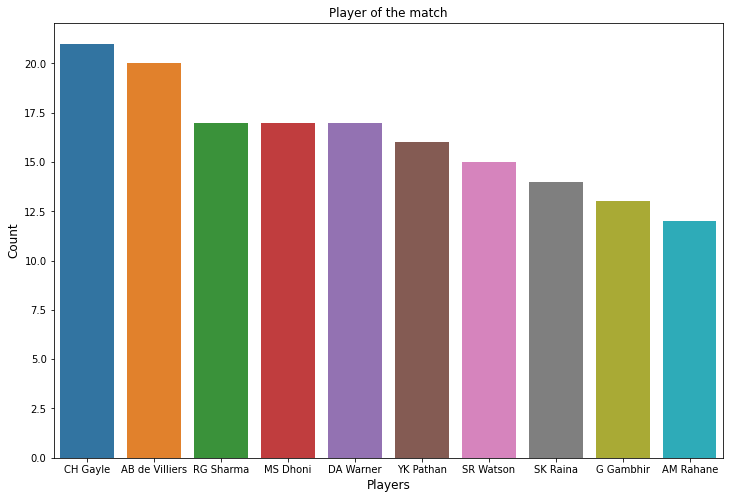

In [16]:
#Gayle and AB de Villers performing well, now lets see if they really help winning the match for the team
plt.figure(figsize=(12,8))
sns.barplot(x=mat.player_of_match.value_counts()[:10].index,y=mat.player_of_match.value_counts()[:10])
plt.title('Player of the match')
plt.xlabel('Players',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

In [17]:
players = mat.player_of_match.value_counts()[:10]
team_names=[]
for i in players.index:
    team_names.append(deli[deli.batsman == i].batting_team.iloc[1])
players_list = list(players.index)

In [18]:
def condition(x):
        if (x['winner'] in team_names) & (x['player_of_match'] in players_list):
            return 1
        else:
            return 0
        

In [19]:
#This column represents a player who was player of the match and also his team won the match
mat['player_of_match_team_win'] = mat.apply(condition,axis=1)

In [20]:
mat['player_of_match_team_win'].value_counts()

0    672
1     84
Name: player_of_match_team_win, dtype: int64

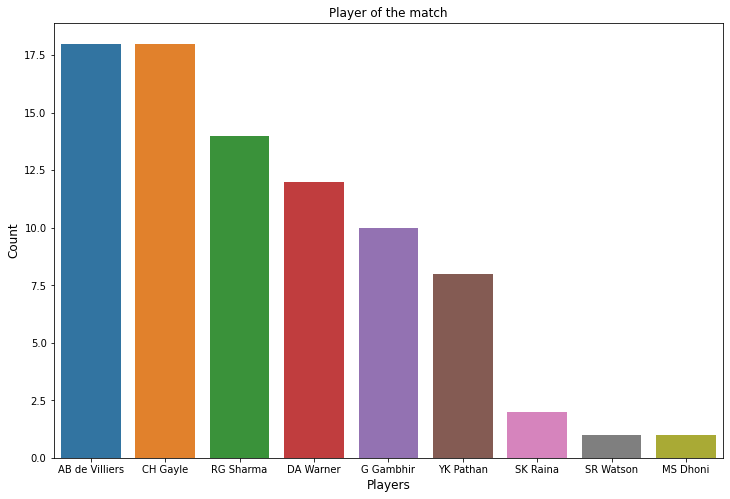

In [21]:
#AB de villiers and CH Gayle led the team to win when they got the player of the match award
plt.figure(figsize=(12,8))
sns.barplot(x=mat[mat.player_of_match_team_win == 1].player_of_match.value_counts().index,y=mat[mat.player_of_match_team_win == 1].player_of_match.value_counts())
plt.title('Player of the match')
plt.xlabel('Players',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

# Thus, we get to conclude below points:
####         1.)Mi and Csk are the winning teams
####         2.)55% of the time who won the toss and chose to field won the match as well
####         3.)AB de villiers and CH Gayle also led the team to win when they got the player of the match award
####         4.)Hence, Companys should endorse there products on these players and teams
